In [1]:
###Based on the Single Variable Linear Regressions that we did. We drop independent variables that have r^2 values less than 0.5.

###For Thailand:
#Energy vs Rice Yield. r^2 = 0.4496550099128842
#Fert vs Rice Yield. r^2 = 0.49261335039781995 (We opted to accept this independent variable since it is a borderline case.)
#Rural Pop vs Rice Yield. r^2 = 0.08879951801722008
#Urban Pop vs Rice Yield. r^2 = 0.09922804647302597
#Pesticide vs Rice Yield. r^2 = 0.07387342794538465
#Pesticide Import vs Rice Yield. r^2 = -0.033083188937942376
#Air Deposition of Nitrogen vs Rice Yield. r^2 = 0.38446470458994186

###adj r^2: 0.6594796544304842 (before) => 0.7117769873331239 (after)

In [ ]:
###No changes made because both rural and urban pop are removed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
%run MLR_Functions.ipynb

In [3]:
df_rice_y = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_crop_yield.csv")
df_fert_use = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_fertilizer_usage.csv")
df_cropland = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_cropland.csv")
#df_energy = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_energy_usage.csv")
#df_pop = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_urban_rural_pop.csv")
df_water = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_water_usage.csv")
#df_pesticide = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_usage.csv")
#df_pesticide_imports = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_imports.csv")
#df_air_dep = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_air_deposition_nitrogen.csv")

In [4]:
df_THAI = pd.DataFrame()
df_THAI["Yield"] = df_rice_y["Thailand Rice Yield"]
df_THAI["Cropland"] = df_cropland["Thailand Crop Land"]
#df_THAI["Energy"] = df_energy["Thailand energy/cropland"]
df_THAI["Fert"] = df_fert_use["Thailand"]
#df_THAI["Rural Pop"] = df_pop["thailand rural/total"]
#df_THAI["Urban Pop"] = df_pop["thailand urban/total"]
df_THAI["Water"] = df_water["wf_tot_m3_t_thailand"]
#df_THAI["Pesticide"] = df_pesticide["India Pesticide"]
#df_THAI["Pesticide Import"] = df_pesticide_imports["Thailand"]
#df_THAI["Air Deposition of Nitrogen"] = df_air_dep["Thailand Air Deposition of Nitrogen"]

df_THAI

,Yield,Cropland,Fert,Water
0,1.9556,20603.0000,50.660000,2801.857667
1,2.2534,20726.0000,46.420002,2559.945281
2,2.1745,20574.0000,54.330000,2614.282257
3,2.0497,20445.0000,71.160000,2440.991593
4,2.3521,20538.0000,66.939995,2249.798274
5,2.4158,20631.0000,73.840000,2387.660821
6,2.4098,20724.0000,75.750000,2071.595781
7,2.3788,20817.0000,75.400000,2345.042479
8,2.4180,20909.0000,85.030000,2419.960932
9,2.4244,21002.0000,91.580000,2048.445773


In [5]:
# Extract the features and the target
df_features, df_target = get_features_targets(df_THAI,["Fert", "Water"],["Yield"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state = 100, test_size = 0.3)

#print(df_features_train)
#print(df_features_test)

# Normalize the features using z normalization
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions

X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((3,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha,iterations)

# call the predict() method
pred: np.ndarray = predict_linreg(df_features_test,beta, means,stds)

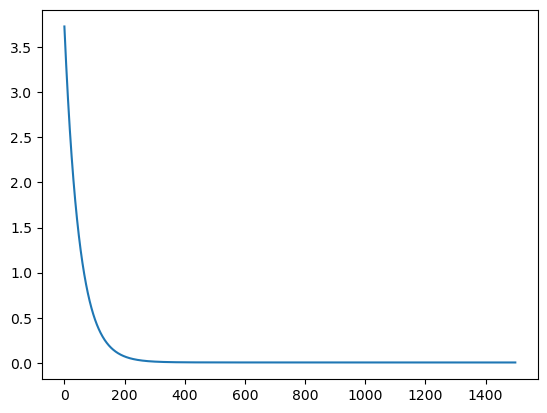

In [6]:
plt.plot(J_storage)

In [7]:
# change target test set to a numpy array
target: np.ndarray = df_target_test.to_numpy()

# Calculate r2 score by calling a function
r2: float = r2_score(target, pred)
    
# Calculate adj r2
#Set the n and k
n = 120
k = 2
adj_r2: float = adj_r_squared(n,k,target,pred)

# Calculate the mse
mse: float = np.mean((target-pred)**2)
    
# Calculate the mae
mae: float = np.mean(np.absolute(target-pred))
    
print(f"r2: {r2}")
print(f"adj_r_squared: {adj_r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

r2: 0.716621071579626
adj_r_squared: 0.7117769873331239
mse: 0.020028300936362754
mae: 0.10317604974186079


In [8]:
print(pred)
print(df_target_test)
print(df_features_test)
print(beta)

[[2.72226472]
 [2.96714009]
 [3.1300566 ]
 [2.95801137]
 [2.37487411]
 [2.88509092]
 [3.22460153]
 [2.88251062]
 [2.64034453]]
     Yield
9   2.4244
26  2.9740
28  3.0380
13  2.9339
5   2.4158
12  2.9338
27  3.0690
25  2.8506
6   2.4098
          Fert        Water
9    91.580000  2048.445773
26  112.460000  1850.208600
28  105.150000  1614.844920
13  111.420000  1856.321877
5    73.840000  2387.660821
12   88.979996  1836.180279
27  126.970000  1605.455422
25  103.760000  1911.477882
6    75.750000  2071.595781
[[ 2.73057058]
 [ 0.09055281]
 [-0.30160569]]


In [9]:
###27  3.0690
###27  0.048660  126.970000   0.494668   0.479088  1605.455422       0.24         10.084006                      9.0383 

country_yield = 3.0690
fert_use = 126.970000
water = 1605.455422

def normalise(feature_value:int, mean, std):
    return (feature_value-mean)/std
    

def get_crop_yield(fert_use, water, beta):
    fert_use_n = normalise(fert_use ,means[0],stds[0])
    water_n = normalise(water ,means[1],stds[1])
    y = beta[0] + beta[1]*fert_use_n + beta[2]*water_n
    return y

print(get_crop_yield(fert_use, water, beta))

[3.22460153]
